In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1640


<Axes: xlabel='Time'>

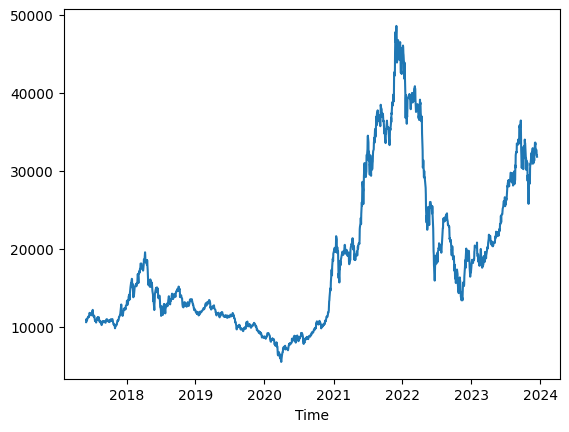

In [2]:
#2. Fetch data and visualize
SSI = stock_historical_data(symbol = "SSI", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(SSI['Close']))
SSI
SSI["Close"].plot()

In [3]:
# Preprocessing
SSI['Lag'] = np.arange(len(SSI.index))
SSI = SSI[['Close', 'Lag']]
SSI

SSI = pd.DataFrame(SSI)
SSI.set_index("Lag", inplace= True)
SSI

,Close
Lag,
0,10570
1,10950
2,10740
3,10870
4,10980
...,...
1635,32700
1636,32600
1637,32000


In [4]:
#3. Slit the data into train : test with ratio 7:3
train_size = int(0.7 * len(SSI))
test_size = int(0.3 * len(SSI))

train_data = SSI[:train_size]
test_data = SSI[train_size:]

In [5]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[23940.23995486],
       [23955.20566276],
       [23970.17137066],
       [23985.13707856],
       [24000.10278646],
       [24015.06849436],
       [24030.03420226],
       [24044.99991016],
       [24059.96561806],
       [24074.93132595],
       [24089.89703385],
       [24104.86274175],
       [24119.82844965],
       [24134.79415755],
       [24149.75986545],
       [24164.72557335],
       [24179.69128125],
       [24194.65698915],
       [24209.62269705],
       [24224.58840495],
       [24239.55411285],
       [24254.51982075],
       [24269.48552865],
       [24284.45123655],
       [24299.41694445],
       [24314.38265235],
       [24329.34836025],
       [24344.31406815],
       [24359.27977605],
       [24374.24548395],
       [24389.21119185],
       [24404.17689975],
       [24419.14260765],
       [24434.10831554],
       [24449.07402344],
       [24464.03973134],
       [24479.00543924],
       [24493.97114714],
       [24508.93685504],
       [24523.90256294],


In [7]:
# 6. 60 days prediction
last_index =  SSI.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[31303.36824145]
 [31318.33394935]
 [31333.29965725]
 [31348.26536515]
 [31363.23107305]
 [31378.19678095]
 [31393.16248885]
 [31408.12819675]
 [31423.09390465]
 [31438.05961255]
 [31453.02532045]
 [31467.99102835]
 [31482.95673625]
 [31497.92244415]
 [31512.88815205]
 [31527.85385995]
 [31542.81956784]
 [31557.78527574]
 [31572.75098364]
 [31587.71669154]
 [31602.68239944]
 [31617.64810734]
 [31632.61381524]
 [31647.57952314]
 [31662.54523104]
 [31677.51093894]
 [31692.47664684]
 [31707.44235474]
 [31722.40806264]
 [31737.37377054]
 [31752.33947844]
 [31767.30518634]
 [31782.27089424]
 [31797.23660214]
 [31812.20231004]
 [31827.16801794]
 [31842.13372584]
 [31857.09943374]
 [31872.06514164]
 [31887.03084954]
 [31901.99655743]
 [31916.96226533]
 [31931.92797323]
 [31946.89368113]
 [31961.85938903]
 [31976.82509693]
 [31991.79080483]
 [32006.75651273]
 [32021.72222063]
 [32036.68792853]
 [32051.65363643]
 [32066.61934433]
 [32081.58505223]

In [9]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 8454.598578256018
Testing MAPE: 29.810150635375955
Testing MAE: 6916.650181019521
MSLR:  0.10751630480625295


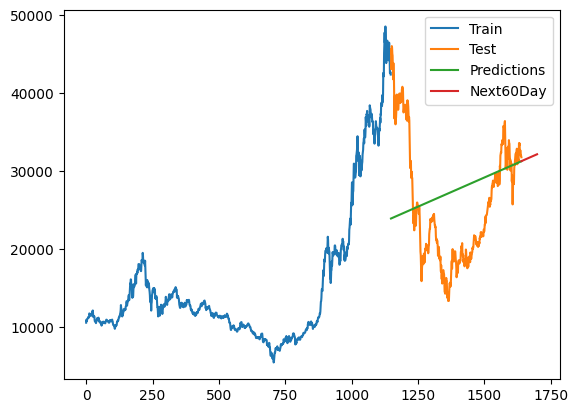

In [10]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()